## Distribution of orders across vendors

/var/folders/s7/6wn70vl94rd_g3s2bnzn45940000gn/T/ipykernel_12019/161126833.py:6: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('/Users/mirabelleyeet/Downloads/restaurant_ds/orders.csv')


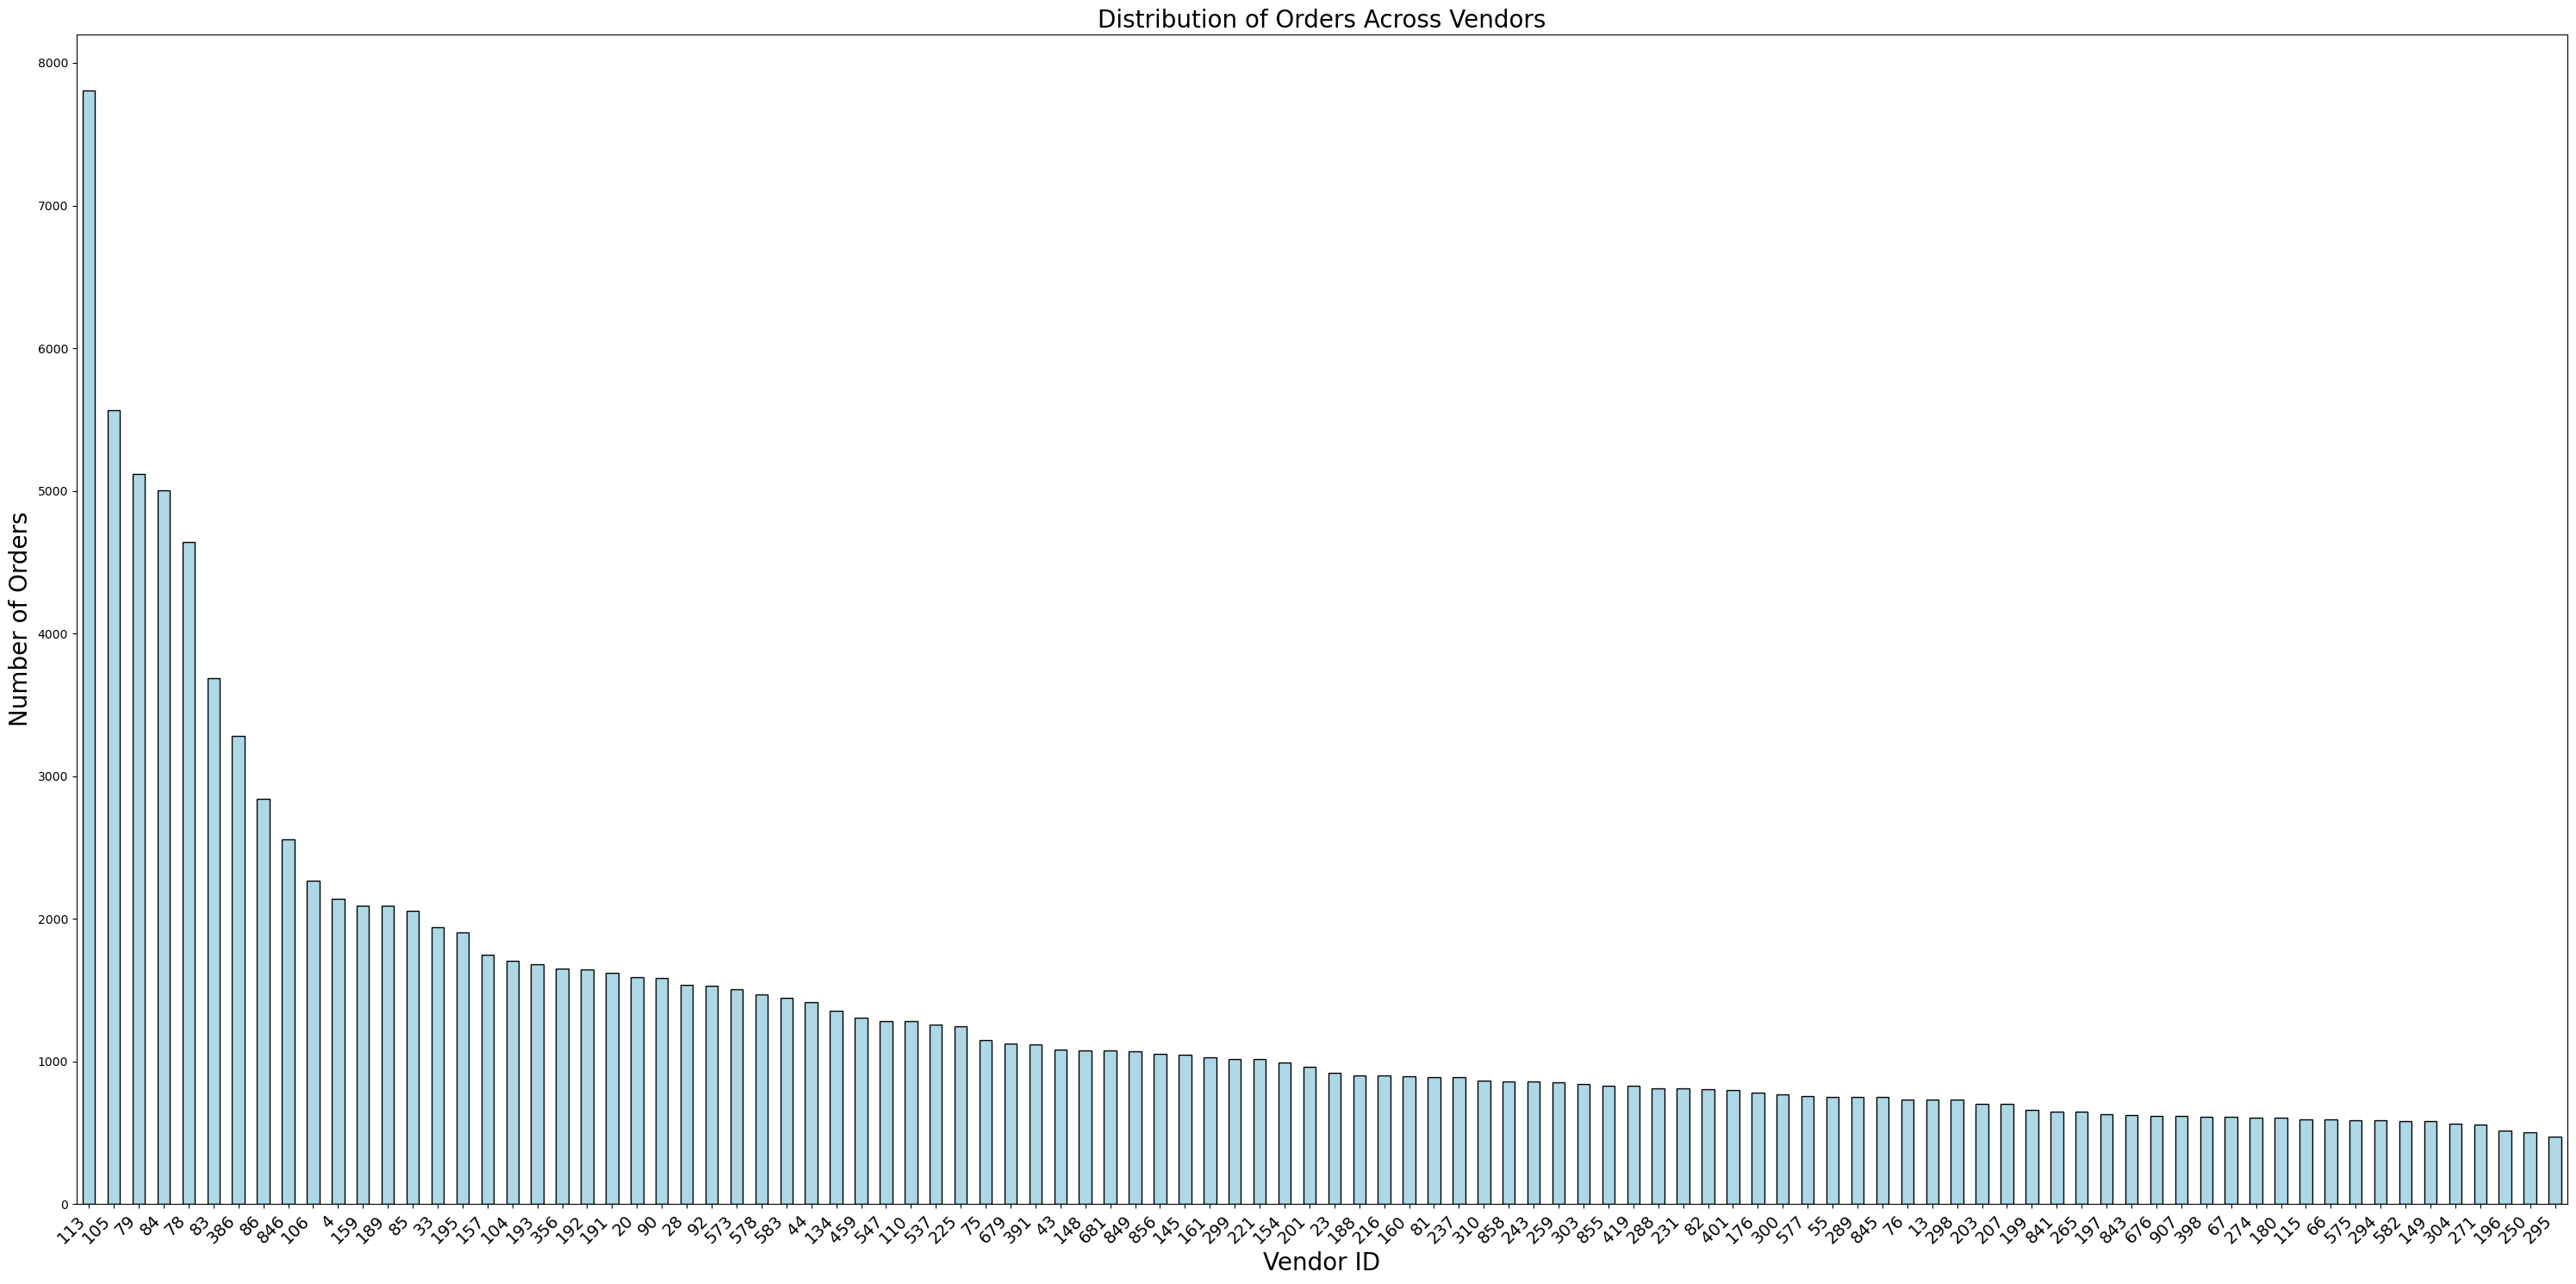

Vendor ID: 113
Tags: Arabic, Desserts, Free Delivery, Indian

Vendor ID: 105
Tags: American, Burgers, Free Delivery, Hot Dogs, Pasta

Vendor ID: 79
Tags: Burgers, Desserts, Free Delivery, Pasta, Sandwiches

Vendor ID: 84
Tags: Burgers, Fries, Kids meal, Shawarma

Vendor ID: 78
Tags: Pizzas, Italian, Breakfast, Soups, Pasta, Salads, Desserts

Vendor ID: 83
Tags: Breakfast, Desserts, Salads, Arabic

Vendor ID: 386
Tags: Churros

Vendor ID: 86
Tags: Cakes, Crepes, Desserts, Donuts, Fresh Juices, Ice creams, Milkshakes, Pancakes, Waffles

Vendor ID: 846
Tags: American, Breakfast, Burgers, Cafe, Desserts, Free Delivery, Fries, Ice creams, Kids meal, Salads

Vendor ID: 106
Tags: American, Burgers, Free Delivery, Hot Dogs, Pasta

Vendor ID: 4
Tags: Arabic, Breakfast, Burgers, Desserts, Free Delivery, Grills, Lebanese, Salads, Sandwiches, Shawarma

Vendor ID: 159
Tags: American, Burgers, Sandwiches

Vendor ID: 189
Tags: Sandwiches, Shawarma, Fresh Juices, Mojitos, Milkshakes

Vendor ID: 85
Tag

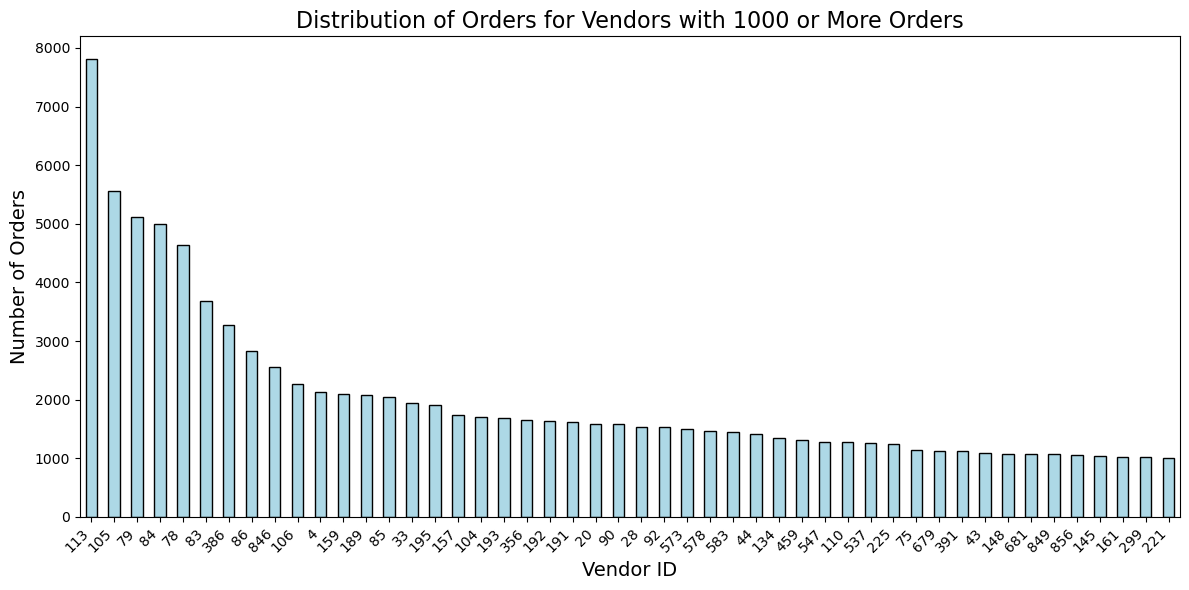

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Loading vendors and orders data
vendors = pd.read_csv('/Users/mirabelleyeet/Downloads/restaurant_ds/vendors.csv')
orders = pd.read_csv('/Users/mirabelleyeet/Downloads/restaurant_ds/orders.csv')

# Extracting relevant columns
vendors = vendors[['id', 'vendor_tag_name']]
orders = orders[['akeed_order_id', 'vendor_id']]

# Merging orders with vendors on the vendor_id (id in vendors)
merged_data = pd.merge(orders, vendors, left_on='vendor_id', right_on='id', how='inner')

# Calculating the order counts per vendor ID
order_counts = merged_data['vendor_id'].value_counts()

# Creating a bar plot for the distribution of orders across vendor IDs
plt.figure(figsize=(30, 15))
order_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Customizing the plot
plt.title('Distribution of Orders Across Vendors', fontsize=20)
plt.xlabel('Vendor ID', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

# Filtering the data to show only the top 15 vendors
top_15_vendors = order_counts.head(15).index
top_15_data = merged_data[merged_data['vendor_id'].isin(top_15_vendors)]

# Creating a list of tags for the top 15 vendors
top_15_tags = {}

for vendor_id in top_15_vendors:
    tags = str(vendors.loc[vendors['id'] == vendor_id, 'vendor_tag_name'].values[0]).split(',')
    top_15_tags[vendor_id] = [tag.strip() for tag in tags]

# Outputting the tags for the top 15 vendors
for vendor_id, tags in top_15_tags.items():
    print(f"Vendor ID: {vendor_id}")
    print(f"Tags: {', '.join(tags)}\n")

# Filtering for vendors with 1000 or more orders
vendors_1000_orders = order_counts[order_counts >= 1000]

# Creating a bar plot
plt.figure(figsize=(12, 6))
vendors_1000_orders.plot(kind='bar', color='lightblue', edgecolor='black')

# Customizing the plot
plt.title('Distribution of Orders for Vendors with 1000 or More Orders', fontsize=16)
plt.xlabel('Vendor ID', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

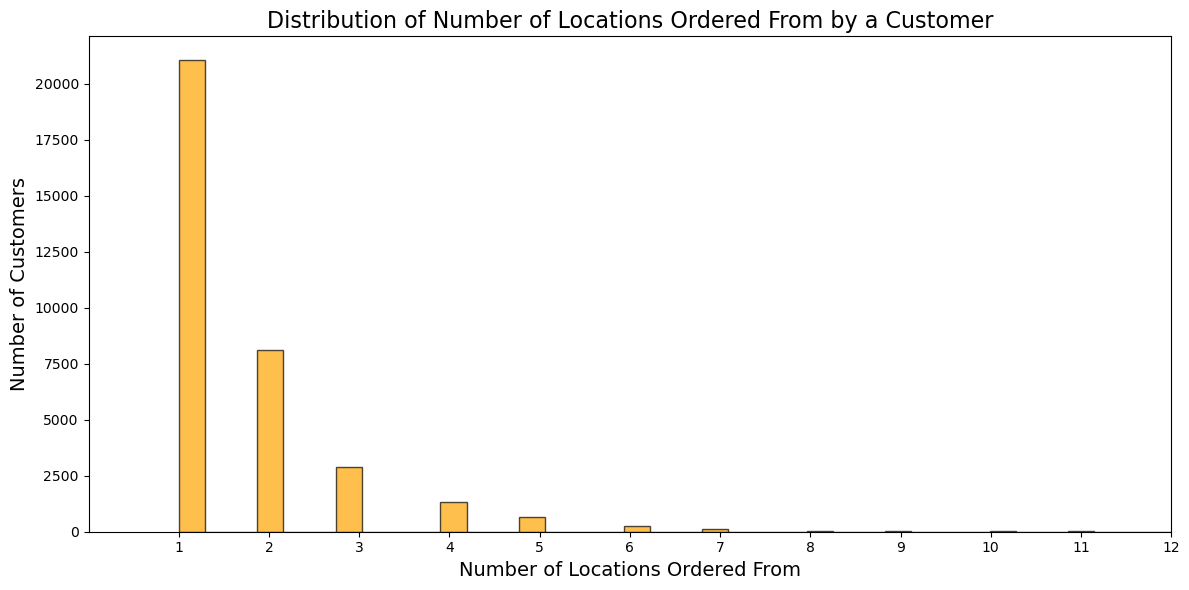

In [34]:
# Loading customers and locations data
train_customers = pd.read_csv('/Users/mirabelleyeet/Downloads/restaurant_ds/train_customers.csv')
train_locations = pd.read_csv('/Users/mirabelleyeet/Downloads/restaurant_ds/train_locations.csv')

# Merging train_customers and train_locations on customer_id
merged_data = pd.merge(train_locations, train_customers, left_on='customer_id', right_on='akeed_customer_id', how='inner')

# Counting the number of unique locations for each customer
customer_location_counts = merged_data.groupby('customer_id')['location_number'].nunique()

# Plotting the distribution of the number of locations ordered from by a customer
plt.figure(figsize=(12, 6))
customer_location_counts.plot(kind='hist', bins=100, color='orange', edgecolor='black', alpha=0.7,)

# Customizing the plot
plt.title('Distribution of Number of Locations Ordered From by a Customer', fontsize=16)
plt.xlabel('Number of Locations Ordered From', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(range(1, customer_location_counts.max() + 1))
plt.xlim(0, 12)
plt.tight_layout()

# Showing the plot
plt.show()